In [1]:
# import pandas as pd

# import matplotlib.pyplot as plt
# import pandana as pdna
# import time

# import urbanaccess as ua
# from urbanaccess.config import settings
# from urbanaccess.gtfsfeeds import feeds
# from urbanaccess import gtfsfeeds
# from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
# from urbanaccess.network import ua_network, load_network

In [2]:
import peartree as pt

In [3]:
path = "/Users/marioag/Downloads/gtfs_subway.zip"

In [4]:
# Automatically identify the busiest day and
# read that in as a Partidge feed
feed = pt.get_representative_feed(path)

# Set a target time period to
# use to summarize impedance
start = 7 * 60 * 60  # 7:00 AM
end = 10 * 60 * 60  # 10:00 AM

# Converts feed subset into a directed
# network multigraph
G = pt.load_feed_as_graph(feed, start, end)

/Users/marioag/opt/anaconda3/envs/ua/lib/python3.12/site-packages/peartree/parallel.py:178: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  deps = tst_sub_dir.departure_time[:-1]
/Users/marioag/opt/anaconda3/envs/ua/lib/python3.12/site-packages/peartree/parallel.py:179: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  arrs = tst_sub_dir.arrival_time[1:]
/Users/marioag/opt/anaconda3/envs/ua/lib/python3.12/site-packages/peartree/parallel.py:197: FutureWarning: The behavior of `series[i:

In [8]:
import networkx as nx

In [ ]:
# create a dataframe for each the nodes and edges
nodes_df = nx.to_pandas_node(G)
edges_df = nx.to_pandas_edgelist(G)

In [11]:
nodes = nx.betweenness_centrality(G)

In [14]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (107 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-macosx_10_13_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl (293 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp312-cp312-macosx_10_13_x86_64.whl (2.3 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl (66 kB)
Using cached pillow-11.3.0-cp312-cp312-macosx_10_13_x86_64.whl (5.3 MB)
Using cached pyparsi

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

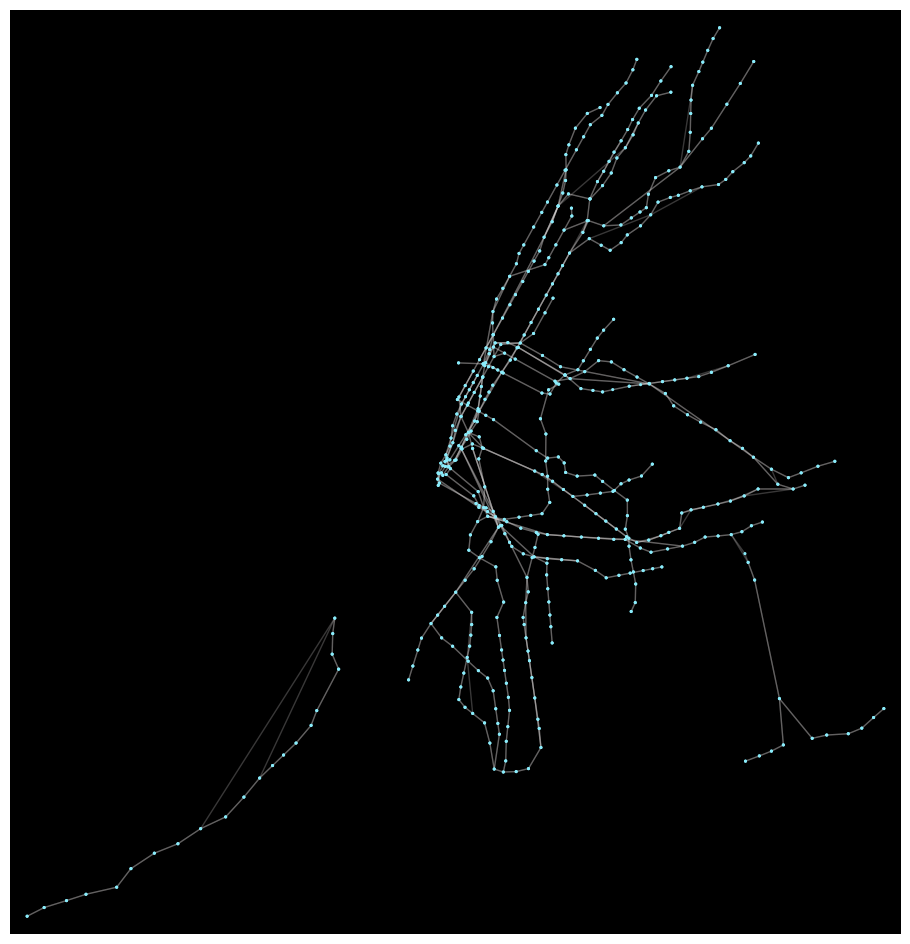

In [16]:
pt.generate_plot(G)

In [18]:
nodes_gdf = pt.utilities.generate_nodes_gdf_from_graph(G)

/Users/marioag/opt/anaconda3/envs/ua/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [22]:
# make a new station id without the last character of id
nodes_gdf["station_id"] = nodes_gdf["id"].str[:-1]

In [25]:
stations_gdf = nodes_gdf.drop_duplicates(subset=["station_id"])

<Axes: >

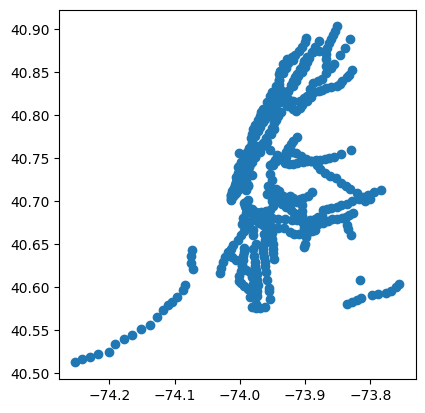

In [27]:
stations_gdf.plot()

In [42]:
stations_gdf.to_file("nyc_subway_stations.geojson", index=False)

In [20]:
edges_df2 = pt.utilities.generate_edges_df_from_graph(G)

In [29]:
edges_df2

,from,to,length,mode
0,6R3XD_101S,6R3XD_103S,90.0,transit
1,6R3XD_103N,6R3XD_101N,120.0,transit
2,6R3XD_103S,6R3XD_104S,90.0,transit
3,6R3XD_104N,6R3XD_103N,90.0,transit
4,6R3XD_104S,6R3XD_106S,90.0,transit
...,...,...,...,...
1107,6R3XD_S29S,6R3XD_S28S,120.0,transit
1108,6R3XD_S30N,6R3XD_S31N,180.0,transit
1109,6R3XD_S30S,6R3XD_S29S,120.0,transit
1110,6R3XD_S31S,6R3XD_S19S,960.0,transit


In [30]:
edges_df2["station_from"] = edges_df2["from"].str[:-1]
edges_df2["station_to"] = edges_df2["to"].str[:-1]

In [32]:
edges_df2.drop_duplicates(subset=["station_from", "station_to"], inplace=True)

In [33]:
edges_df2

,from,to,length,mode,station_from,station_to
0,6R3XD_101S,6R3XD_103S,90.0,transit,6R3XD_101,6R3XD_103
1,6R3XD_103N,6R3XD_101N,120.0,transit,6R3XD_103,6R3XD_101
2,6R3XD_103S,6R3XD_104S,90.0,transit,6R3XD_103,6R3XD_104
3,6R3XD_104N,6R3XD_103N,90.0,transit,6R3XD_104,6R3XD_103
4,6R3XD_104S,6R3XD_106S,90.0,transit,6R3XD_104,6R3XD_106
...,...,...,...,...,...,...
1107,6R3XD_S29S,6R3XD_S28S,120.0,transit,6R3XD_S29,6R3XD_S28
1108,6R3XD_S30N,6R3XD_S31N,180.0,transit,6R3XD_S30,6R3XD_S31
1109,6R3XD_S30S,6R3XD_S29S,120.0,transit,6R3XD_S30,6R3XD_S29
1110,6R3XD_S31S,6R3XD_S19S,960.0,transit,6R3XD_S31,6R3XD_S19


In [37]:
pd.__version__

'1.5.0'

In [43]:
import geopandas as gpd

In [44]:
gpd.GeoDataFrame(edges_df2).to_file("nyc_subway_edges.geojson", index=False)